## Single Layer Adaline 
* first part based on **batch gradient descent**
* second part based on **stochastic gradient descent**

in this notebook we gonna implement a single layer Adaline that uses gradient descent based on object-oriented approach. then we will plot the descision regions of a trained instance of our neuron class, and another plot in order to see the loss value in each epoch (codes are available in the book python machine learning by sebastian raschka).

a brief introduction to Adaline :
    Adaline is another type of single-layer neural network, the key difference between the Adaline rule and rosenblatt's perceptron is that the weights are updated based on a linear activation function.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd 

---
### First Part :

In [6]:

class AdalineGD(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            #print(self.w_)
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)       # derivative of mean squared error function with respect to self.w_[1:] variables
            self.w_[0] += self.eta * errors.sum()           # derivative of mean squared erro function with respect to self.w_[0] variable
            cost = (errors**2).sum() / 2.0                  # mean squared error function
            #print(f"X.shpae and self.w_.shape : {X.shape},{self.w_.shape} X : {X},\n y : {y} ,\nnet_input : {net_input}, \nerrors : {errors}, \nself.w_ : {self.w_}, \ncost : {cost}")
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### use pandas to load and prepare our model's data provided by Iris dataset

In [7]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 
                 'iris','iris.data')
print("URL",s)

URL https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [8]:
df = pd.read_csv(s,
                header=None,
                encoding='utf-8'
                )
df.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#select setosa and versicolor class of df

y = df.iloc[0:100,4]    # set the value first 100 rows and 4's column of df as 'y' vector
y = np.where(y == "Iris-setosa", -1, 1)     # set label value 1 for Iris-versicolor class and -1 for Iris-setosa class

X = df.iloc[0:100, [0,2]].values     # extract sepal length and petal length (first and third column) as 'X' vector

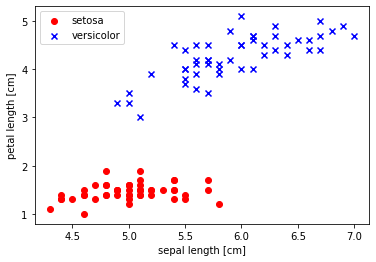

In [10]:
# plot our data subset

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()                      # this scatterplot will show the ditribution of flower examples in the Iris dataset along the two feature axes : petal length and sepal length 

In [11]:
# creating a function to visualize the decision boundaries for this two-dimensional dataset

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

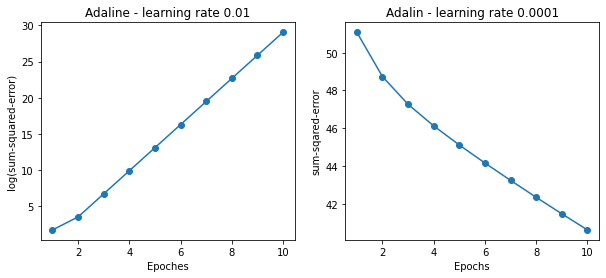

In [12]:
# now lets plot the cost against the number of epoches for the two different learning rates 0.01 , 0.0001

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1 ),
           np.log10(ada1.cost_), marker='o')


ax[0].set_xlabel('Epoches')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline - learning rate 0.01')


ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('sum-sqared-error')
ax[1].set_title('Adalin - learning rate 0.0001')



plt.show()

In [13]:
# next, for better and faster convergence using gradient descent, we will standardize our features. which gives our data the properties of a standard normal distribution.

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


/tmp/ipykernel_1074896/593193164.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


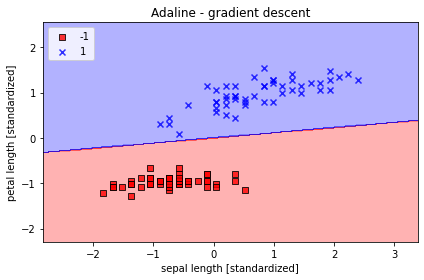

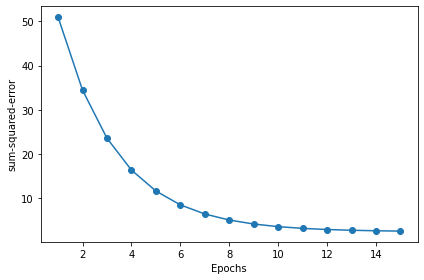

In [14]:
#after this standardization, we will train Adaline again and we will see that it now converges after a small number of epoches using learning rate of 0.01

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - gradient descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_)+1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.tight_layout()
plt.show()


---
### Second Part :

in the second part we gonna implement a single layer Adaline neuron based on **stochastic gradient descent (SGD)**

In [15]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent
        cycles.
    random_state : int
        Random number generator seed for random weight
        initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training examples in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

as we build the class, next move is training a instance of this class via `fit` method and ploting the decision regions using `plot_decision_region` function, and then plot the *average cost* of each epoch.

/tmp/ipykernel_1074896/593193164.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


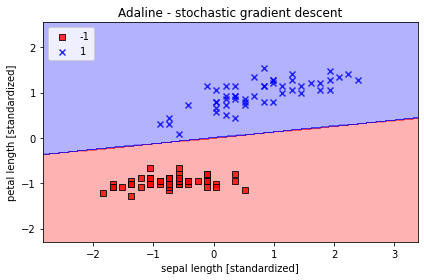

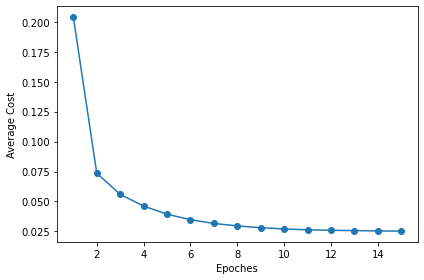

In [16]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)



plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - stochastic gradient descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_)+1), ada_sgd.cost_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()